In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
base_dir = './'
data_dir = os.path.join(base_dir, 'data')
results_dir = os.path.join(base_dir, 'results')

<Axes: xlabel='date'>

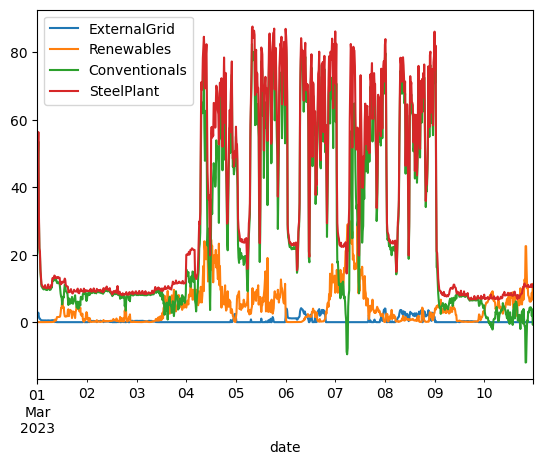

In [3]:
results = pd.read_csv(os.path.join(results_dir, 'a_results.csv'))\
            .rename(columns={'GridSim.ExternalGrid-0-P[MW]': 'ExternalGrid', 
                            'FlexSim.FLSim-0-P[MW]': 'Renewables',
                            'FlexSim.FLSim-1-P[MW]': 'Conventionals',
                            'SteelPlantSim.SteelPlant_0-P[MW]': 'SteelPlant',
                            'PowerPlantSim.PowerPlant_0-P[MW]': 'PowerPlant',
                            })
results['date'] = pd.to_datetime(results['date'], utc=False)
results.set_index('date', inplace=True)
results['delta'] = results['SteelPlant'] - results['Renewables']
results['ExternalGrid'] = np.clip(results['delta'] - results['Conventionals'], 0, results['delta'])
results['Conventionals'] = results['SteelPlant'] - results['Renewables'] - results['ExternalGrid']

results[['ExternalGrid', 
         'Renewables',
         'Conventionals',
         'SteelPlant']].plot()